<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL/blob/master/tutorials/3-Practical/FinRL_PaperTrading_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from finrl.train import train
from finrl.test import test
from finrl.config_tickers import DOW_30_TICKER
from finrl.config import INDICATORS
from finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv
from finrl.meta.env_stock_trading.env_stock_papertrading import AlpacaPaperTrading
from finrl.meta.data_processor import DataProcessor
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from common import *

import numpy as np
import pandas as pd

/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [2]:
ticker_list = DOW_30_TICKER
action_dim = len(DOW_30_TICKER)
candle_time_interval = '1Min'  # '1Min'

env = StockTradingEnv

start_date = '2022-3-1'
end_date = '2022-6-1'

In [3]:
account_value = test(start_date = start_date, 
      end_date = end_date,
      ticker_list = ticker_list, 
      data_source = 'alpaca',
      time_interval= candle_time_interval, 
      technical_indicator_list= INDICATORS,
      drl_lib='elegantrl', 
      env=env,
      model_name='ppo', 
      API_KEY = API_KEY, 
      API_SECRET = API_SECRET, 
      API_BASE_URL = API_BASE_URL,
#       erl_params=ERL_PARAMS,
      cwd='./papertrading_erl', #current_working_dir
      if_plot=True, # to return a dataframe for backtest_plot
      break_step=1e7)

Alpaca successfully connected
Load data from data/alpaca_2022-3-1_2022-6-1.pkl
The data looks like: 
                    timestamp      open      high       low     close   volume  \
0  2022-03-01 09:30:00-05:00  164.6260  164.7000  164.6099  164.6099  25648.0   
1  2022-03-01 09:30:00-05:00  226.3300  226.3300  226.3300  226.3300      0.0   
2  2022-03-01 09:30:00-05:00  193.2800  193.2800  193.2800  193.2800      0.0   
3  2022-03-01 09:30:00-05:00  203.7000  203.7000  203.7000  203.7000      0.0   
4  2022-03-01 09:30:00-05:00  187.2000  187.2000  187.2000  187.2000      0.0   
5  2022-03-01 09:30:00-05:00  212.9500  212.9500  212.9500  212.9500      0.0   
6  2022-03-01 09:30:00-05:00   55.5000   55.5000   55.5000   55.5000      0.0   
7  2022-03-01 09:30:00-05:00  145.2500  145.2500  145.2000  145.2000   5748.0   
8  2022-03-01 09:30:00-05:00  147.9800  147.9800  147.9800  147.9800      0.0   
9  2022-03-01 09:30:00-05:00   58.5800   58.5800   58.5800   58.5800      0.0   
10 2022

/home/zihan/research/FinRL/finrl/agents/elegantrl/models.py:110: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  s_tensor = _torch.as_tensor((state,), device=device)


Test Finished!
episode_return 0.9336257022080233


In [4]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = start_date,
        end = end_date)

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (64, 8)
Annual return         -0.035567
Cumulative returns    -0.009155
Annual volatility      0.214068
Sharpe ratio          -0.065990
Calmar ratio          -0.310642
Stability              0.326391
Max drawdown          -0.114496
Omega ratio            0.989142
Sortino ratio         -0.087682
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.674925
Daily value at risk   -0.027026
dtype: float64


==============Compare to DJIA===========
date 64
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (64, 8)


Start date,2022-03-01
End date,2022-05-31
Total months,3
,Backtest
Annual return,-19.919%
Cumulative returns,-5.485%
Annual volatility,31.34%
Sharpe ratio,-0.56
Calmar ratio,-1.03
Stability,0.38
Max drawdown,-19.404%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.40,2022-03-29,2022-05-19,NaT,NaN
1,5.40,2022-03-02,2022-03-14,2022-03-18,13
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
New Normal,-0.07%,-5.16%,4.12%


/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


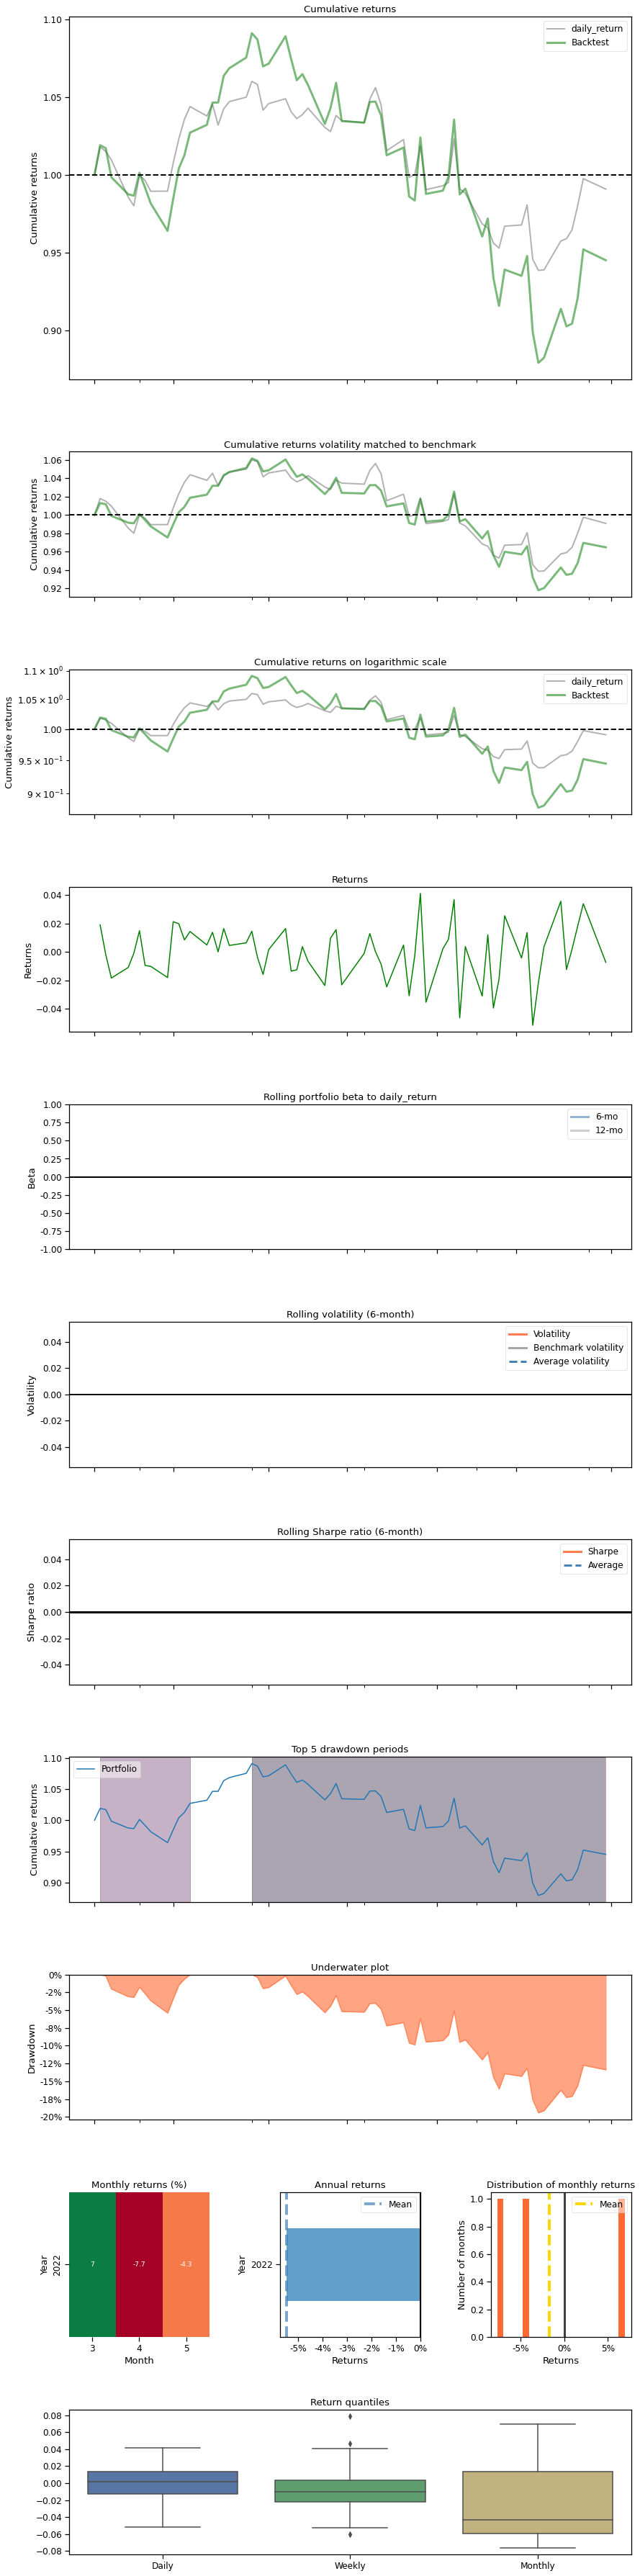

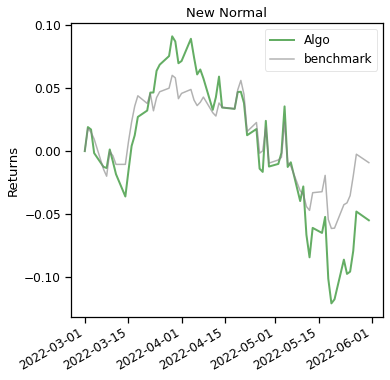

In [5]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = start_date,
             baseline_end = end_date)